In [1]:
!pip -q install kiwipiepy pandas matplotlib

import os
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from kiwipiepy import Kiwi


In [2]:
file_path = r"C:\Users\TEST OS\03.비정형\1893615\text\paragraphs.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

print(text[:500])


[1]
여자라면 누구나 옷장에 레깅스 한두 벌쯤 가지고 있을 테죠. 레깅스는 한때 여행 룩의 정답처럼 여겨지며, 공항 패션의 대명사로 자리 잡기도 했습니다. 하지만 최근 패션 걸들이 주목하는 바지는 따로 있습니다. 레깅스만큼 편안하지만, 훨씬 더 세련된 트라우저 가 그 주인공이죠. 허리를 조이지 않는 밴딩 디테일과 몸선을 부드럽게 감싸는 여유로운 실루엣, 꾸민 듯 안 꾸민 듯한 분위기. 플레어 팬츠부터 넉넉한 핏의 스트레치 트라우저까지, 여행 룩에 불어닥친 변화는 일시적인 유행이 아닙니다. 편안함을 기본값으로 두되, 데일리 룩의 레벨을 한 단계 끌어올린 이 ‘코지한 팬츠’의 흐름은 2026년까지 이어질 전망이죠.

[2]
연말 휴가를 앞둔 지금, 가장 스타일리시한 여자들은 공항과 휴양지에서 과연 어떤 바지를 입고 있을까요? 프리양카 초프라 는 뉴욕 JFK 공항에서 올 블랙 룩에 부드러운 플레어 팬츠를 매치해 편안함과 세련미를 모두 잡았습니다. 요르단의 라니아 왕비 는 베니스 공항에서


In [3]:
text = text.lower()

text = re.sub(r"[^가-힣a-z\s]", " ", text)

text = re.sub(r"\s+", " ", text).strip()

print(text[:300])


여자라면 누구나 옷장에 레깅스 한두 벌쯤 가지고 있을 테죠 레깅스는 한때 여행 룩의 정답처럼 여겨지며 공항 패션의 대명사로 자리 잡기도 했습니다 하지만 최근 패션 걸들이 주목하는 바지는 따로 있습니다 레깅스만큼 편안하지만 훨씬 더 세련된 트라우저 가 그 주인공이죠 허리를 조이지 않는 밴딩 디테일과 몸선을 부드럽게 감싸는 여유로운 실루엣 꾸민 듯 안 꾸민 듯한 분위기 플레어 팬츠부터 넉넉한 핏의 스트레치 트라우저까지 여행 룩에 불어닥친 변화는 일시적인 유행이 아닙니다 편안함을 기본값으로 두되 데일리 룩의 레벨을 한 단계 끌어올린 이 


In [4]:
kiwi = Kiwi()

nouns = [
    tok.form
    for tok in kiwi.tokenize(text)
    if tok.tag in ("NNG", "NNP")
]

print(nouns[:30], " ...")
print("명사 토큰 개수:", len(nouns))


['여자', '옷장', '레깅스', '레깅스', '한때', '여행', '룩', '정답', '공항', '패션', '대명사', '자리', '최근', '패션', '걸', '주목', '바지', '레깅스', '편안', '세련', '트라우저', '주인공', '허리', '밴', '디테일', '몸', '선', '여유', '실루엣', '분위기']  ...
명사 토큰 개수: 281


In [5]:
stopwords = set([
    "그리고","하지만","또","더","및","등","수","것","거","때","곳","이번","지난","올해","내년","최근","당시",
    "관련","대해","통해","위해","따라","이날","현재","이후","이전","모두","각각","일부","다수",
    "경우","상황","사실","문제","결과","기자","보도","발표","설명",

 
    "the","and","to","of","is","in","a","an","or","but","if","are","was","were","be","been","being",
    "for","with","on","at","by","from","as","so","than","too","very"
])

filtered_words = [w for w in nouns if w not in stopwords and len(w) > 1]

top20 = Counter(filtered_words).most_common(20)
top20


[('팬츠', 18),
 ('편안', 7),
 ('여행', 6),
 ('실루엣', 5),
 ('플레어', 5),
 ('선택', 5),
 ('플리스', 5),
 ('셋 업', 5),
 ('공항', 4),
 ('트라우저', 4),
 ('트랙', 4),
 ('스타일', 4),
 ('레깅스', 3),
 ('분위기', 3),
 ('이동', 3),
 ('소재', 3),
 ('아이템', 3),
 ('고민', 3),
 ('여자', 2),
 ('옷장', 2)]

In [6]:
df = pd.DataFrame(Counter(filtered_words).items(), columns=["keyword", "frequency"])
df = df.sort_values(by="frequency", ascending=False).reset_index(drop=True)

df.to_csv("keyword_frequency.csv", index=False, encoding="utf-8-sig")

df.head(20)


,keyword,frequency
0,팬츠,18
1,편안,7
2,여행,6
3,플레어,5
4,실루엣,5
5,플리스,5
6,선택,5
7,셋 업,5
8,스타일,4
9,공항,4


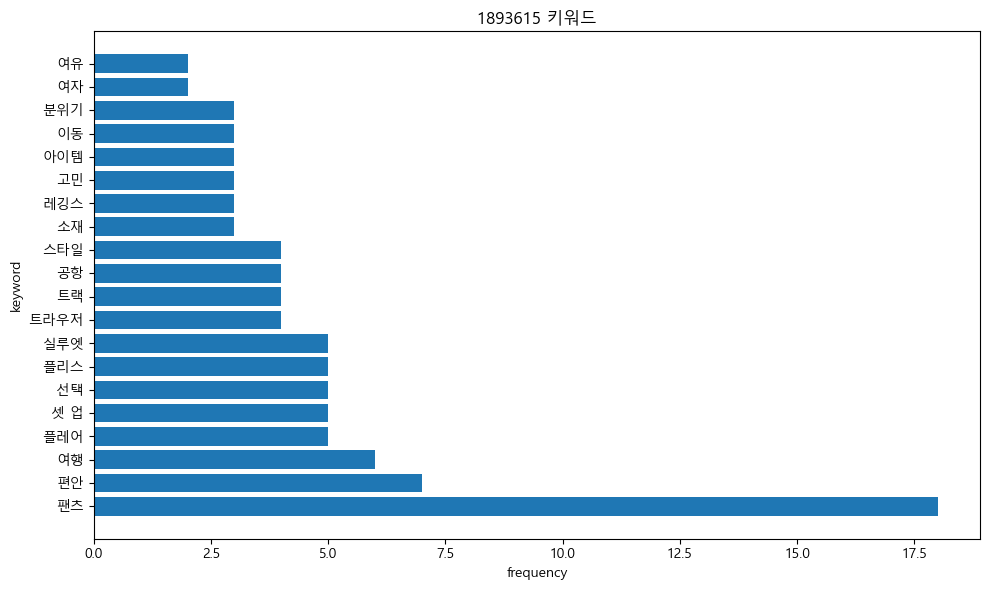

In [7]:
font_candidates = ["Malgun Gothic", "맑은 고딕", "Gulim", "굴림"]
available_fonts = {f.name for f in font_manager.fontManager.ttflist}

chosen = None
for fc in font_candidates:
    if fc in available_fonts:
        chosen = fc
        break

if chosen is not None:
    rc("font", family=chosen)
plt.rcParams["axes.unicode_minus"] = False

top20_df = df.head(20).copy()
top20_df = top20_df.sort_values("frequency", ascending=True)  # 가로막대 보기 좋게

plt.figure(figsize=(10, 6))

plt.barh(top20_df["keyword"], top20_df["frequency"])
plt.gca().invert_yaxis()

plt.title("1893615 키워드")
plt.xlabel("frequency")
plt.ylabel("keyword")

plt.tight_layout()
plt.show()
